<a href="https://colab.research.google.com/github/JaquelinedeJesus/Practicas-segundo-Parcial/blob/main/Newton%20diferencias%20divididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]']]
[[ 0.0e+00  1.0e+00  7.7e-01 -4.8e-01 -1.1e-01  6.6e-02  1.8e-03  0.0e+00]
 [ 1.0e+00  1.3e+00  6.2e-01 -5.5e-01 -4.9e-02  6.8e-02  0.0e+00  0.0e+00]
 [ 2.0e+00  1.6e+00  4.6e-01 -5.8e-01  1.2e-02  0.0e+00  0.0e+00  0.0e+00]
 [ 3.0e+00  1.9e+00  2.8e-01 -5.7e-01  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 4.0e+00  2.2e+00  1.1e-01  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]]
Dividida: 
[-0.5 -0.1  0.1  0.   0. ]
polinomio: 
-0.483696666666666*x + 0.00181121399177148*(x - 1.9)*(x - 1.6)*(x - 1.3)*(x - 1.0) + 0.0658950617283951*(x - 1.6)*(x - 1.3)*(x - 1.0) - 0.108748888888889*(x - 1.3)*(x - 1.0) + 1.24889166666667
polinomio simplificado: 
0.00181121399177148*x**4 + 0.0553900205761205*x**3 - 0.343298688271582*x**2 + 0.0736781532921604*x + 0.977614300411529


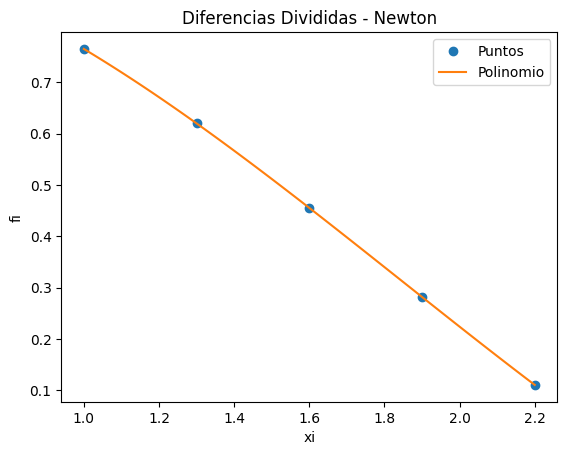

In [ ]:
# Diferencias divididas de Newton

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Ejercicio 2
xi = np.array([1, 1.3, 1.6, 1.9, 2.2])
fi = np.array([0.765195, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

# Tabla de Diferencias Divididas
titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias divididas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añadir título de cada columna
    titulo.append('F['+str(j-2)+']')

    # cada fila de columna
    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1

    diagonal = diagonal - 1
    j = j+1

# Polinomio con diferencias Divididas
# caso: puntos equidistantes en eje x
Dividida = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = Dividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# Salida
np.set_printoptions(precision = 1)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('Dividida: ')
print(Dividida)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencias Divididas - Newton')
plt.show()